## 타이타닉 생존자 예측 모델
- 탑승객 정보를 기반으로 해당 탑승객의 생존 여부를 예측한다.

In [1]:
%pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import sklearn

In [3]:
# Data load
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head(3)

df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# EDA (Exploratory Data Analysis) -> 데이터 탐험 (데이터의 유무 확인)
print(df_train.columns) # train
print(df_test.columns) # test

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [6]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [7]:
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 어떤 컬럼을 살리고, 어떤 컬럼을 지울 것인가? → 시각화를 통해 진행
import matplotlib.pyplot as plt
import seaborn as sns

# def bar_chart(column_name) :

df_train[df_train["Survived"] == 1]
df_train[df_train["Survived"] == 1]["Pclass"] # Pclass 컬럼의 데이터 출력

# df_train[df_train["Survived"] == 1]["Pclass"].value_counts()
# df_train[df_train["Survived"] == 0]["Pclass"].value_counts()
survived = df_train[df_train["Survived"] == 1]["Pclass"].value_counts()
dead = df_train[df_train["Survived"] == 0]["Pclass"].value_counts()

df_merged = pd.DataFrame({"Survived":survived, "Dead": dead})
df_merged
df_merged.plot(kind="bar", stacked=True, figsize=(12,8))

In [ ]:
def bar_chart(column_name):
      survived = df_train[df_train["Survived"] == 1][column_name].value_counts()
      dead = df_train[df_train["Survived"] == 0][column_name].value_counts()

      df_merged = pd.DataFrame({"Survived":survived, "Dead": dead})
      df_merged.plot(kind="bar", stacked=True, figsize=(12,8))

In [ ]:
# bar_chart("Sex")
bar_chart("Cabin")

In [ ]:
# 질문 1. 어떤 column이 생존 확률에 영향을 미칠까?
# 형제의 수
bar_chart('SibSp')

In [ ]:
bar_chart('Parch')

In [ ]:
# 선착장
bar_chart('Embarked')

In [ ]:
# 가장 많은 요금을 낸 상위 10명의 생존율은 어떻게 될까요?
# Fare : 요금에 따라서 정렬 / 오름차순
# head(5) 상위 5명 || tail(5) 하위 5명
# df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]]
# 인원 카운트
df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]].value_counts()

In [ ]:
df_train[["Name","Survived"]]

In [12]:
# 이름으로 값들 추려서 확인
train_test_data = [df_train, df_test]

for data in train_test_data:
    data["Name"] = data["Name"].str.extract(" ([A-Za-z]+)\. ") # extract 추출하기

In [13]:
df_train["Name"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [14]:
# 문자열 -> 숫자형 데이터로 변경
name_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5
}
for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

In [15]:
df_train["Name"].value_counts()

0.0    517
1.0    182
2.0    125
3.0     40
4.0      7
5.0      6
Name: Name, dtype: int64

In [ ]:
bar_chart("Name")

In [16]:
# Sex
df_train["Sex"] = df_train["Sex"].replace({"male":0, "female":1})
df_test["Sex"] = df_test["Sex"].replace({"male":0, "female":1})

In [17]:
df_train["Sex"].value_counts()
df_test["Sex"].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [18]:
# Age
df_train["Age"].isna().sum()

177

In [19]:
df_train.groupby("Name")["Age"].mean()

Name
0.0    32.368090
1.0    21.773973
2.0    35.898148
3.0     4.574167
4.0    42.000000
5.0    43.166667
Name: Age, dtype: float64

In [20]:
df_train["Age"].fillna(df_train.groupby("Name")["Age"].transform("mean"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Name")["Age"].transform("mean"), inplace=True)

In [21]:
df_train["Age"].isna().sum()
df_test["Age"].isna().sum()

1

In [22]:
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)
df_test["Age"].isna().sum()

0

In [23]:
# Age
import numpy as np

# age_bins = [0, 16, 32, np.inf] #inf: infinite
age_bins = [0, 16, 32, 50, 100]
age_labels = [0, 1, 2, 3]

for data in train_test_data:
    data["Age"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

df_train["Age"].value_counts()

1    382
2    341
0    104
3     64
Name: Age, dtype: int64

In [24]:
# SibSp, Parch
for data in train_test_data:
    data["Family"] = data["SibSp"] + data["Parch"] + 1

df_train["Family"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [25]:
# Fare
df_train["Fare"].isna().sum() # null 데이터 갯수 체크

fare_bins = [0, 20, 100, 1000]
fare_labels = [0, 1, 2]

for data in train_test_data:
    data["Fare"] = pd.cut(data["Fare"], bins=fare_bins, labels=fare_labels)

df_train["Fare"].value_counts()

0    500
1    323
2     53
Name: Fare, dtype: int64

In [26]:
df_train
df_test
df_test["Age"].fillna(0, inplace=True)
df_test["Age"].isna().sum()

0

In [27]:
# Embarked
# null data 확인
df_train["Embarked"].isna().sum()
df_test["Embarked"].isna().sum()

# null data 채워주기
df_train["Embarked"].fillna(0, inplace=True)
df_test["Embarked"].fillna(0, inplace=True)

In [28]:
df_train["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})
df_test["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})

df_train["Embarked"].value_counts()

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [29]:
df_train
drop_train_cols = ["PassengerId", "SibSp", "Parch", "Ticket", "Cabin"]
df_train_final = df_train.drop(drop_train_cols, axis=1)
df_train_final

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,0.0,0,1,0,0.0,2
1,1,1,2.0,1,2,1,1.0,2
2,1,3,1.0,1,1,0,0.0,1
3,1,1,2.0,1,2,1,0.0,2
4,0,3,0.0,0,2,0,0.0,1
...,...,...,...,...,...,...,...,...
886,0,2,5.0,0,1,0,0.0,1
887,1,1,1.0,1,1,1,0.0,1
888,0,3,1.0,1,1,1,0.0,4
889,1,1,0.0,0,1,1,1.0,1


In [30]:
df_test
drop_test_cols = ["SibSp", "Parch", "Ticket", "Cabin"]

df_test_final = df_test.drop(drop_test_cols, axis=1)
df_test_final

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,0.0,0,2,0,0.0,1
1,893,3,2.0,1,2,0,1.0,2
2,894,2,0.0,0,3,0,0.0,1
3,895,3,0.0,0,1,0,0.0,1
4,896,3,2.0,1,1,0,0.0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0.0,1
414,1306,1,NaN,1,2,2,0.0,1
415,1307,3,0.0,0,2,0,0.0,1
416,1308,3,0.0,0,1,0,0.0,1


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [33]:
df_train_final.fillna(0, inplace=True)
df_train_final.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [34]:
df_test_final.fillna(0, inplace=True)
df_test_final.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [35]:
features = df_train_final.drop('Survived', axis=1)
labels = df_train_final['Survived']

In [36]:
# kfold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [37]:
dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)

80.12858926342072


In [38]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)

79.68289637952559


In [39]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(rf, features, labels, cv=kfold, scoring="accuracy")

# scores
print(np.mean(scores)*100)

80.23845193508114


In [40]:
# GaussianNB
gb = GaussianNB()
scores = cross_val_score(gb, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)

80.5792759051186


In [48]:
# SVC
svc = SVC()
scores = cross_val_score(svc, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)

83.38451935081149


In [49]:
# SVC 알고리즘을 사용해서 최종 결과 값 도출
svc.fit(features, labels)
scores = cross_val_score(svc, features, labels, cv=kfold, scoring="accuracy")

In [50]:
# 수능 문제는?
test_data = df_test_final.drop("PassengerId", axis=1)
test_data   # 수능 문제

,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,3,0.0,0,2,0,0.0,1
1,3,2.0,1,2,0,1.0,2
2,2,0.0,0,3,0,0.0,1
3,3,0.0,0,1,0,0.0,1
4,3,2.0,1,1,0,0.0,3
...,...,...,...,...,...,...,...
413,3,0.0,0,1,0,0.0,1
414,1,0.0,1,2,2,0.0,1
415,3,0.0,0,2,0,0.0,1
416,3,0.0,0,1,0,0.0,1


In [51]:
pred = svc.predict(test_data)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
df_final_submit = pd.DataFrame({
    "PassengerId": df_test_final["PassengerId"],
    "Survived": pred
    })

df_final_submit.set_index("PassengerId", inplace=True)

In [53]:
df_final_submit.to_csv("submission.csv")

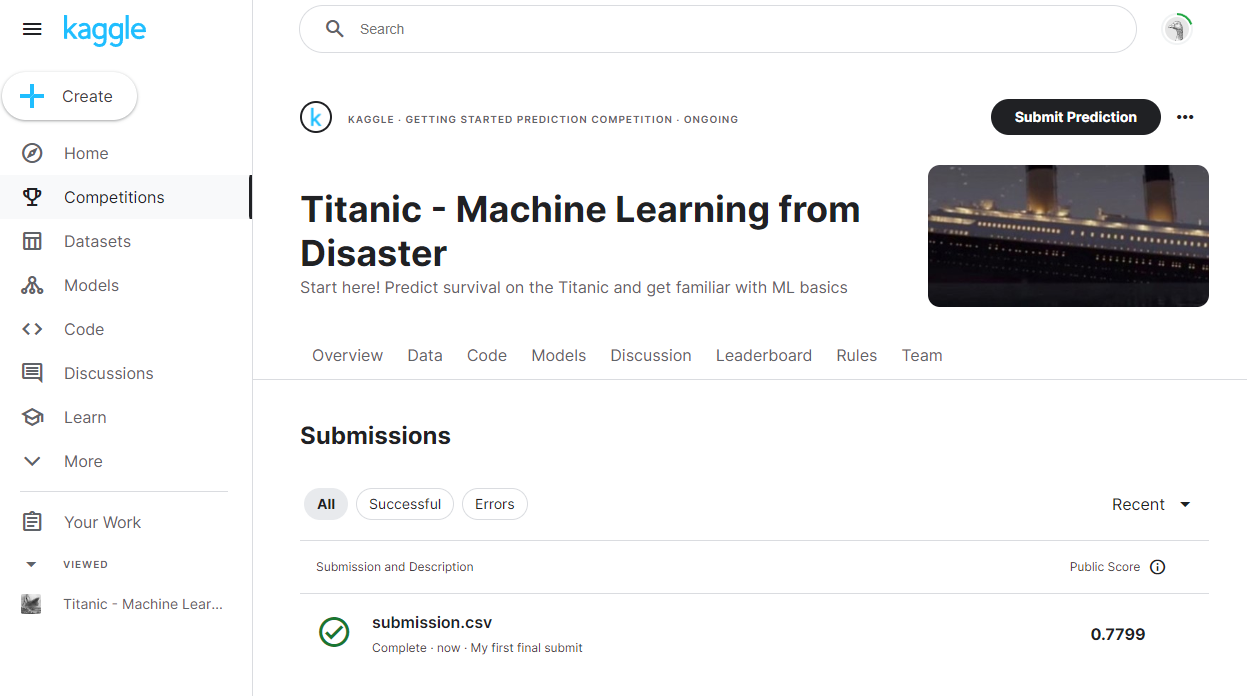